In [108]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

(320, 2) (320,) (80, 2) (80,)


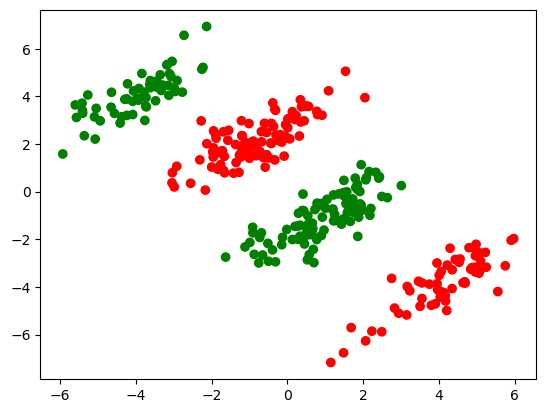

In [53]:
#data generate
mean1, mean2 = np.array([-1, 2]), np.array([1, -1])
mean3, mean4 = np.array([4, -4]), np.array([-4, 4])
covar = np.array([[1.0, 0.8], [0.8, 1.0]])
X1 = np.random.multivariate_normal(mean1, covar, 100)
X1 = np.vstack((X1, np.random.multivariate_normal(mean3, covar, 100)))
y1 = np.ones(X1.shape[0])
X2 = np.random.multivariate_normal(mean2, covar, 100)
X2 = np.vstack((X2, np.random.multivariate_normal(mean4, covar, 100)))
y2 = -1 * np.ones(X2.shape[0])
X_train = np.vstack((X1[:160], X2[:160]))
y_train = np.hstack((y1[:160], y2[:160]))
X_test = np.vstack((X1[160:], X2[160:]))
y_test = np.hstack((y1[160:], y2[160:]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# 设置颜色参数
colors = {1:'r', -1:'g'}
# 绘制二分类数据集的散点图
plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=pd.Series(y_train).map(colors))
plt.show()

Text(0, 0.5, 'x2')

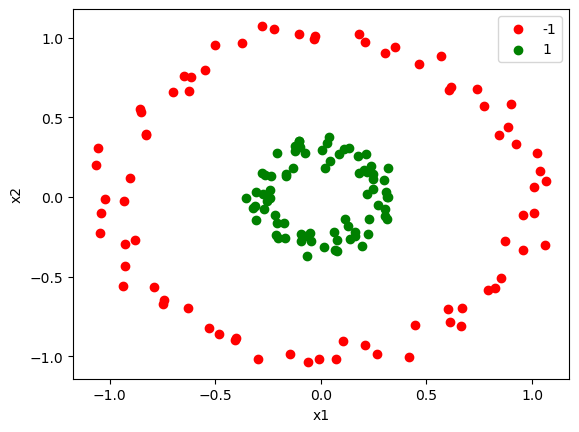

In [159]:
# 导入模拟环形数据生成模块
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=150, noise=0.05, factor=0.3, random_state=20)
# 将标签转换为1/-1
y_ = y.copy()
y_[y_==0] = -1
y_ = y_.astype(float)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.3, random_state=43)
# 绘制二分类数据集的散点图
plt.scatter(X[y_==-1][:,0], X[y_==-1][:,1], color='r', label='-1')
plt.scatter(X[y_==1][:,0], X[y_==1][:,1], color='g', label='1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')

In [160]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
model1 = SVC(kernel="rbf")
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
loss1 = log_loss(y_true=y_test,y_pred=y_pred)
model1 = SVC(kernel="linear")
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
loss2 = log_loss(y_true=y_test,y_pred=y_pred)
print(f"svm 无核函数 loss:{loss2} 高斯核函数 loss:{loss1}")

svm 无核函数 loss:12.280738130610093 高斯核函数 loss:9.992007221626415e-16


In [161]:
x_train = torch.tensor(X_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)
x_test = torch.tensor(X_test,dtype=torch.float32)
# y_test = torch.tensor(y_test,dtype=torch.float32)


In [176]:
#纬度转换
class fnn(nn.Module):
    def __init__(self):
        super(fnn,self).__init__()
        self.net = nn.Sequential(nn.Linear(2,3),
                            nn.Tanh(),
                            nn.Linear(3,3),
                            nn.Tanh(),
                            nn.Linear(3,3),
                            nn.Tanh(),
                            nn.Linear(3,3),
                            nn.Tanh(),
                            nn.Linear(3,2),
                            nn.Tanh(),
                            )
    def forward(self,x):
        x_new = self.net(x)
        return x_new


def loss_f(x_new,y):
    loss = 0
    for i in range(x_new.shape[0]):
        if y[i] == 1:
            loss += (x_new[i][0]-1)**2+(x_new[i][1]-1)**2
        else:
            loss += (x_new[i][0]+1)**2+(x_new[i][1]+1)**2
    return loss

model = fnn()
optim = torch.optim.SGD(model.parameters(),lr = 0.001)

for epoch in range(1000):
    optim.zero_grad()
    x_new = model.forward(x_train)
    loss = loss_f(x_new,y_train)
    loss.backward()
    optim.step()

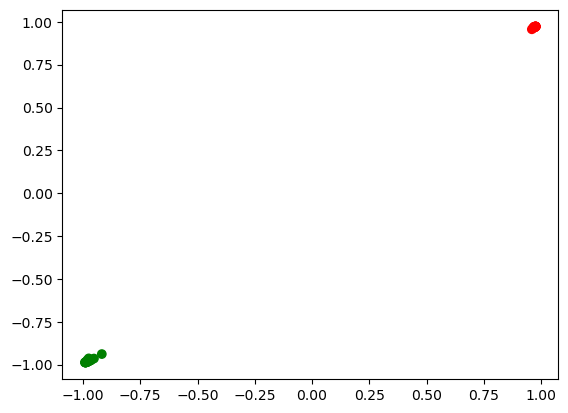

In [177]:
with torch.no_grad():
    b = model(x_test).numpy()
# 设置颜色参数
colors = {1:'r', -1:'g'}
# 绘制二分类数据集的散点图
plt.scatter(b[:,0], b[:,1], marker='o', c=pd.Series(y_test).map(colors))
plt.show()

In [178]:
with torch.no_grad():
    model1 = SVC()
    model1.fit(model(x_train).numpy(),y_train.numpy())
    y_pred=model1.predict(b)
    a = y_test == y_pred
a

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])